# Relatório Final - Introdução à Ciência de Dados (2020)
## Pontifícia Universidade Católica do Paraná (PUCPR)

* Professor Eduardo Kugler Viegas
* Professor Jean Paul Barddal
* Professor Vilmar Abreu Junior

`Jessica Ilkiw Lopes` - `jessica.ilkiw@gmail.com`

# Introdução

   Hepatite é um termo genérico que significa inflamação no fígado, que pode ser causada por medicamentos, doenças autoimunes, metabólicas, genéticas, álcool, substâncias tóxicas e vírus. As hepatites virais são as mais comuns, sendo causadas por vírus hepatotrópicos, designados por letras do alfabeto (vírus A, vírus B, vírus C, vírus D e vírus E). No Brasil, as hepatites virais mais comuns são as causadas pelos vírus A, B e C. Existem, ainda, os vírus D e E, esse último mais frequente na África e na Ásia. Milhões de pessoas no Brasil são portadoras dos vírus B ou C e não sabem. Elas correm o risco de as doenças evoluírem (tornarem-se crônicas) e causarem danos mais graves ao fígado, como a cirrose e câncer. O diagnóstico precoce da hepatite amplia a eficácia do tratamento. A base de dados aqui analisada é de pacientes portadores de hepatite (não sendo especificado o tipo) que contém 20 variáveis e o total de 1 milhão de instâncias. Algumas das variáveis apresentadas na base de dados representam características dos pacientes, como idade do paciente e gênero, assim como sinais/sintomas clínicos, como fadiga, mal-estar, anorexia, figado aumentado e "firme" (característica conhecida como hepatomegalia), baço palpável (esplenomegalia), presença ou ausência de "aranha vascular" - um tipo de telangiectasia (vasos muito finos existentes na superfície da pele e configuram um problema basicamente estético já que não costumam apresentar sintomas, ou seja, os pacientes não têm sensações ruins atreladas a eles) -, ascite (que é o acúmulo anormal de líquido rico em proteínas no interior do abdômen, no espaço entre os tecidos que revestem o abdômen e os órgãos abdominais), varizes (veias dilatadas e deformadas, de coloração púrpuro-azulada, que surgem ao longo das pernas e podem causar dor e inchaço). Possíveis tratamentos também são descritos, o que inclui uso ou não de antivirais e esteroides (este último possivelmente se referindo ao uso de anti-inflamatórios esteroides). Outros fatores importantes descritos na base de dados são os resultados de exames laboratoriais que podem ser importantes no diagnóstico de hepatite, como bilirrubina, fosfatase alcalina, aspartato transaminase (AST), também chamada de transaminase glutâmica oxalacética sérica (SGOT ou TGO), albumina, tempo de protrombina (aqui nomeado PROTIME) e histologia (análise das células do fígado através de biópsia). Por fim, a base de dados apresenta quantos desses pacientes sobreviveram ou não. 


# Importe todas as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Carregando os dados
Abaixo, carregue os seus dados usando o *pandas* e realize as operações necessárias para limpar os dados. Também, verifique se os tipos de dados são adequados para as suas análises posteriores.

In [2]:
# carregue os dados aqui
df = pd.read_csv('datasets_projeto_csv/datasets_projeto_csv/BNG_hepatitis.csv')

In [3]:
df = df.sample(frac=0.01, random_state=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 276826 to 175434
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              10000 non-null  float64
 1   SEX              10000 non-null  object 
 2   STEROID          10000 non-null  object 
 3   ANTIVIRALS       10000 non-null  object 
 4   FATIGUE          10000 non-null  object 
 5   MALAISE          10000 non-null  object 
 6   ANOREXIA         10000 non-null  object 
 7   LIVER_BIG        10000 non-null  object 
 8   LIVER_FIRM       10000 non-null  object 
 9   SPLEEN_PALPABLE  10000 non-null  object 
 10  SPIDERS          10000 non-null  object 
 11  ASCITES          10000 non-null  object 
 12  VARICES          10000 non-null  object 
 13  BILIRUBIN        10000 non-null  float64
 14  ALK_PHOSPHATE    10000 non-null  float64
 15  SGOT             10000 non-null  float64
 16  ALBUMIN          10000 non-null  float64
 17  PROTIM

In [5]:
df.head(5)

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
276826,51.021637,female,no,no,yes,no,no,yes,no,yes,yes,yes,yes,5.185160,87.396654,73.834579,3.678289,32.699447,yes,DIE
849425,48.678283,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.643706,86.255362,64.186930,4.216774,57.257385,yes,LIVE
504499,38.361577,female,no,no,yes,yes,yes,yes,no,no,yes,no,no,6.824581,77.496402,22.732428,4.034230,78.724236,no,DIE
601054,45.456802,male,no,no,no,no,no,yes,yes,no,no,no,no,0.557364,81.151737,99.561217,3.335005,25.879596,no,LIVE
980221,29.033731,female,yes,no,yes,no,no,yes,yes,no,no,yes,no,0.576757,85.930826,278.008937,4.155596,38.642044,yes,LIVE


In [6]:
df.tail(5)

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
662322,32.137096,female,yes,no,yes,no,no,yes,no,no,no,yes,no,5.560456,103.549903,65.106479,4.699833,11.412975,yes,LIVE
423063,59.350357,female,no,no,yes,no,no,yes,no,no,yes,no,no,0.434329,68.016868,173.679136,3.523148,29.824489,no,LIVE
610680,29.254426,female,no,no,no,no,no,yes,no,no,yes,no,no,5.344304,155.750395,19.205810,3.392475,101.113576,yes,DIE
639271,48.958449,female,no,no,yes,yes,yes,yes,no,yes,no,yes,no,1.376654,87.021196,80.629962,2.619140,25.515133,yes,DIE
175434,40.129208,female,no,yes,yes,no,no,no,yes,no,yes,no,no,0.827175,51.780201,38.224085,4.165674,69.219329,yes,LIVE


In [7]:
df.describe()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.027778,1.407961,106.047475,85.821981,3.843545,49.735633
std,12.576758,1.226249,46.750229,89.604111,0.617049,24.001889
min,11.808698,-1.756036,9.888678,-147.298419,1.988564,-5.721030
25%,32.625731,0.731080,76.318384,34.415188,3.541563,30.757343
50%,39.558846,1.000000,92.262814,56.388991,3.969377,44.589585
75%,49.377486,1.427950,125.653774,92.924890,4.165449,65.519327
max,86.042014,8.746939,358.515678,616.827595,6.497245,116.295126


In [8]:
df.columns

Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY', 'Class'],
      dtype='object')

In [9]:
df.count

<bound method DataFrame.count of               AGE     SEX STEROID ANTIVIRALS FATIGUE MALAISE ANOREXIA  \
276826  51.021637  female      no         no     yes      no       no   
849425  48.678283  female     yes         no     yes      no       no   
504499  38.361577  female      no         no     yes     yes      yes   
601054  45.456802    male      no         no      no      no       no   
980221  29.033731  female     yes         no     yes      no       no   
...           ...     ...     ...        ...     ...     ...      ...   
662322  32.137096  female     yes         no     yes      no       no   
423063  59.350357  female      no         no     yes      no       no   
610680  29.254426  female      no         no      no      no       no   
639271  48.958449  female      no         no     yes     yes      yes   
175434  40.129208  female      no        yes     yes      no       no   

       LIVER_BIG LIVER_FIRM SPLEEN_PALPABLE SPIDERS ASCITES VARICES  \
276826       yes   

In [10]:
#Retirar dados negativos
dfBneg = df[df['BILIRUBIN'] < 0]
dfSneg = df[df['SGOT'] <0] 
dfPneg = df[df['PROTIME'] < 0]

In [11]:
df.drop(dfBneg.index, inplace = True)

In [12]:
df.drop(dfSneg.index, inplace = True)

In [13]:
df.drop(dfPneg.index, inplace = True)

In [14]:
#Para conferir que agora só temos dados acima de Zero

df.describe()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME
count,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000
mean,41.015899,1.414304,106.057748,86.647612,3.843760,49.767165
std,12.574204,1.223483,46.753117,89.355272,0.616596,24.004778
min,11.808698,0.016537,9.888678,0.661823,1.988564,0.515152
25%,32.640350,0.733758,76.331775,34.756728,3.542434,30.754247
50%,39.538194,1.000000,92.282663,56.525672,3.969324,44.575284
75%,49.370920,1.429377,125.677268,93.468142,4.165417,65.534808
max,86.042014,8.746939,358.515678,616.827595,6.497245,116.295126


* Através da análise dos dados acima pudemos observar que não há dados faltantes a serem limpos, porém foi realizada a limpeza de dados laboratoriais negativos (que não fazem sentido no contexto de análises laboratoriais)

# Análise univariadas

Nesta seção você deverá apresentar uma análise univariada de dados que analise **ao menos 10 variáveis**. 

O objetivo é apresentar o comportamento das variáveis, principalmente no que tange sua distribuição.
Para cada uma das 10 variáveis apresentadas, apresente, ao menos:
* Média
* Moda
* Desvio padrão
* Uma discussão sobre o viés da variável


#### Variável 1: Idade

In [15]:
# Média da idade
df['AGE'].mean()

41.01589945898483

In [16]:
# Desvio padrão da idade
df['AGE'].std()

12.574203808259021

In [17]:
#Mediana da idade
df['AGE'].median()

39.538194

In [18]:
#Moda da idade
df['AGE'].mode()

0       11.808698
1       12.381289
2       12.589791
3       12.670104
4       12.680529
          ...    
9906    78.623347
9907    80.035636
9908    80.706179
9909    83.086216
9910    86.042014
Length: 9911, dtype: float64

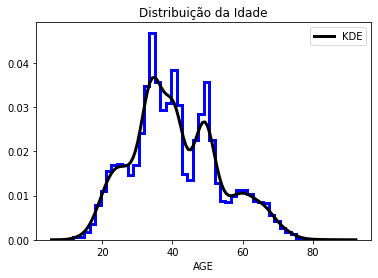

In [200]:
#Histograma de distribuição da Idade 
sns.distplot(df['AGE'], rug_kws={"color": "g"},

                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},

                  hist_kws={"histtype": "step", "linewidth": 3,

                            "alpha": 1, "color": "blue"})
plt.title('Distribuição da Idade')
plt.show()

#### Idade
A média da idade dos pacientes desse banco de dados, assim como o histograma distribuição de idade condizem com a distribuição da hepatite no Brasil e no mundo, sendo mais comum em pessoas entre 30-39 anos (Indiana Report of Infectious Diseases, 2001). A tendência é que com o envelhecimento populacional a distribuição também seja arrastada para idades mais avançadas.



In [140]:
#Filtro pra avaliar diferenças entre gêneros
mask1 = df[df['SEX'] == 'female']
mask2 = df[df['SEX'] == 'male']
mask1['AGE'].mean(), mask2['AGE'].mean()

(41.20806547316955, 39.499942274439505)

In [141]:
mask1['AGE'].std(), mask2['AGE'].std()

(12.571807636361555, 12.495458009294472)

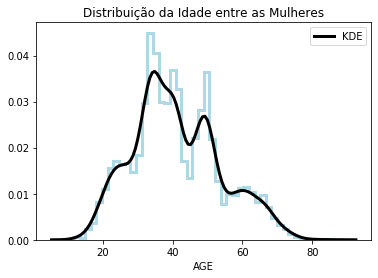

In [198]:
sns.distplot(mask1['AGE'], rug_kws={"color": "g"},

                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},

                  hist_kws={"histtype": "step", "linewidth": 3,

                            "alpha": 1, "color": "lightblue"})
plt.title('Distribuição da Idade entre as Mulheres')
plt.show()

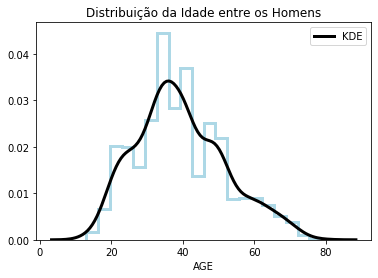

In [199]:
sns.distplot(mask2['AGE'], rug_kws={"color": "g"},

                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},

                  hist_kws={"histtype": "step", "linewidth": 3,

                            "alpha": 1, "color": "lightblue"})
plt.title('Distribuição da Idade entre os Homens')
plt.show()

#### Variável 2: Albumina

In [20]:
# Média Albumina
df['ALBUMIN'].mean()

3.8437600369286793

In [21]:
# Desvio padrão Albumina
df['ALBUMIN'].std()

0.6165959639240708

In [22]:
#Mediana Albumina
df['ALBUMIN'].median()

3.969324

In [23]:
#Moda Albumina
df['ALBUMIN'].mode()

0     2.409192
1     3.433527
2     3.461587
3     3.485456
4     3.551820
5     3.587863
6     3.660382
7     3.917753
8     3.938104
9     3.940630
10    3.951069
11    3.951392
12    3.956724
13    3.959038
14    3.960213
15    3.961069
16    3.963948
17    3.964590
18    3.965442
19    3.966629
20    3.970607
21    3.973763
22    3.974630
23    3.977014
24    3.977153
25    3.977511
26    3.977856
27    3.980467
28    3.984691
29    3.985775
30    3.989295
31    3.989713
32    3.995581
33    3.997247
34    4.001346
35    4.007550
36    4.010523
37    4.012921
38    4.018759
39    4.039654
40    4.120216
41    4.134030
42    4.147135
43    4.166090
44    4.176542
45    4.199668
46    4.208190
47    4.221452
48    4.233000
49    4.290094
50    4.298030
dtype: float64

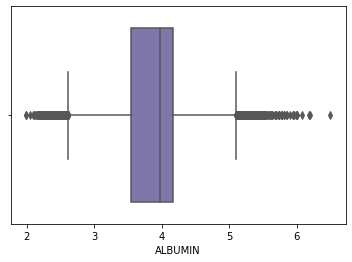

In [203]:
sns.boxplot(df['ALBUMIN'], palette='Purples_d')
plt.show()

#### Albumina
A albumina é uma proteína produzida no fígado e é necessária para diversos processos no organismo, como transporte de hormônios e nutrientes e para regular o pH e manter o equilíbrio osmótico do organismo, o que acontece por meio da regulação da quantidade de água no sangue. O exame da albumina é solicitado pelo médico para avaliar o estado nutricional da pessoa e auxiliar o diagnóstico de doenças renais e do fígado. Os valores de referência para albumina a partir de 16 anos	ficam 3,5-4,7 g/dL. Os valores diminuídos de albumina no sangue também podem ser indicativos de problemas no fígado, em que há diminuição da produção dessa proteína.



#### Variável 3: TGO

In [25]:
# Média TGO
df['SGOT'].mean()

86.64761200686118

In [26]:
# Desvio padrão TGO
df['SGOT'].std()

89.3552716839993

In [27]:
#Mediana TGO
df['SGOT'].median()

56.525672

In [28]:
#Moda TGO
df['SGOT'].mode()

0    96.02318
dtype: float64

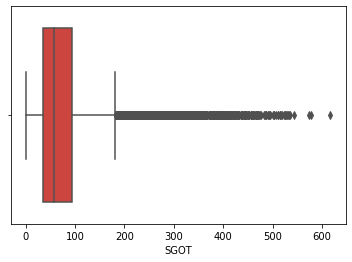

In [204]:
sns.boxplot(df['SGOT'], palette='Reds_d')
plt.show()

#### Aminotransferase de Aspartate (AST, TGO ou SGOT)
AST é uma enzima normalmente contida dentro das células do fígado.  O nível normal de TGO é de 5 a 40 u/L no sangue e se o fígado estiver com algum problema, as células liberam esta enzima na corrente sanguínea, elevando os níveis destas enzimas no sangue e sinalizando um possível problema.

#### Variável 4: Bilirrubina

In [30]:
# Média Bilirrubina
df['BILIRUBIN'].mean()

1.4143042593078372

In [31]:
# Desvio padrão Bilirrubina
df['BILIRUBIN'].std()

1.223483378675713

In [32]:
#Mediana Bilirrubina
df['BILIRUBIN'].median()

1.0

In [33]:
#Moda dBilirrubina
df['BILIRUBIN'].mode()

0    1.0
dtype: float64

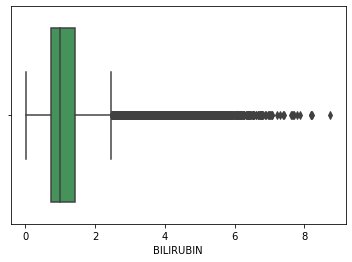

In [205]:
sns.boxplot(df['BILIRUBIN'], palette= 'Greens_d')
plt.show()

#### Bilirrubina
É um pigmento da bile produzido por quebra do heme e redução da biliverdina, que normalmente circula no plasma sanguíneo. É absorvido por células do fígado e conjugado de modo a formar diglucuronide, um pigmento solúvel em água excretada na bile. O exame de bilirrubina auxilia o diagnóstico de problemas no fígado, vias biliares ou anemia hemolítica e seus índices normais são até 1,2 mg/dL. O aumento da bilirrubina pode indicar hepatite viral, doença alcoólica do fígado, pedra nas vias biliares, tumores no fígado ou nas vias biliares, entre outras patologias.


#### Variável 5: Fosfatase Alcalina

In [35]:
# Média Fosfatase Alcalina
df['ALK_PHOSPHATE'].mean()

106.0577479078801

In [36]:
# Desvio padrão Fosfatase Alcalina
df['ALK_PHOSPHATE'].std()

46.753117350612875

In [37]:
#Mediana Fosfatase Alcalina
df['ALK_PHOSPHATE'].median()

92.282663

In [38]:
#Moda Fosfatase Alcalina
df['ALK_PHOSPHATE'].mode()

0         9.888678
1        13.252407
2        20.767103
3        21.343573
4        22.412465
           ...    
9906    289.069619
9907    293.077395
9908    297.908202
9909    313.239696
9910    358.515678
Length: 9911, dtype: float64

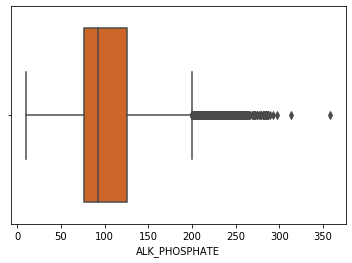

In [206]:
sns.boxplot(df['ALK_PHOSPHATE'], palette='Oranges_d')
plt.show()

#### Fosfatase alcalina
A fosfatase alcalina é uma enzima encontrada em diversos tecidos incluindo fígado, ossos, rins, intestino e placenta - mas as maiores concentrações de fosfatase alcalina estão no fígado e ossos. O exame de fosfatase alcalina mede os níveis dessa enzima no sangue e geralmente é pedido juntamente com outros exames que avaliam a função hepática, como TGO ou gama GT. OS valores de referência são ligeiramente distintos entre homens e mulheres, sendo para os homens: 40 a 129 U/L e para as mulheres: 35 a 104 U/L. O aumento da fosfatase alcalina pode significar problemas hepáticos, obstrução biliar, condições ósseas, tumores ósseos, hiperparatireoidismo, leucemia, raquitismo, entre outras.




In [144]:
# mask1 = mulheres
# mask2 = homens
mask1['ALK_PHOSPHATE'].mean() , mask2['ALK_PHOSPHATE'].mean()

(105.9119591692815, 107.20784453991043)

In [145]:
mask1['ALK_PHOSPHATE'].std() , mask2['ALK_PHOSPHATE'].std()

(46.61517415552553, 47.83312539217134)

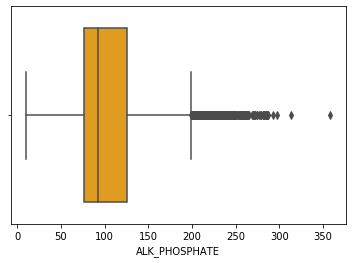

In [211]:
sns.boxplot(mask1['ALK_PHOSPHATE'], color= 'orange')
plt.show()

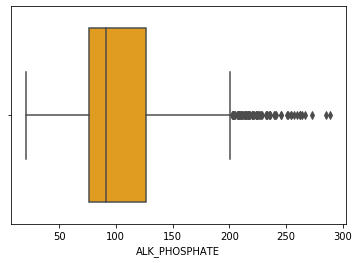

In [212]:
sns.boxplot(mask2['ALK_PHOSPHATE'], color= 'orange')
plt.show()

Mesmo avaliando a variável separando os gêneros, não houve mudança significativa.

#### Variável 6: Tempo de Protrombina

In [40]:
# Média Tempo de Protrombina
df['PROTIME'].mean()

49.767164804964054

In [41]:
# Desvio padrão Tempo de Protrombina
df['PROTIME'].std()

24.004777989259242

In [42]:
#Mediana Tempo de Protrombina
df['PROTIME'].median()

44.575284

In [43]:
#Moda Tempo de Protrombina
df['PROTIME'].mode()

0    49.970259
dtype: float64

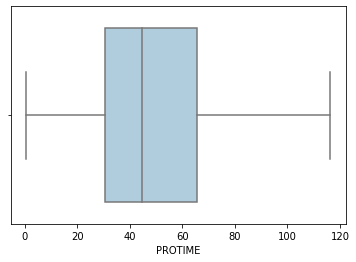

In [319]:
sns.boxplot(df['PROTIME'], palette='RdBu_d')
plt.show()

#### Tempo de Atividade da Protrombina (TP, TAP, PROTIME)
A protrombina é formada no fígado, e para que sua síntese ocorra, é necessária a presença da vitamina K. O tempo de protrombina é um teste para avaliar a via extrínseca e a via comum da coagulação sanguínea e assim, o TP estará aumentado em casos de deficiência de fibrinogênio e de qualquer um dos fatores de coagulação, em pacientes que fazem uso de anticoagulantes, nas doenças hepáticas e deficiência de vitamina K, pois os fatores II, VII e X são dependentes desta vitamina. O valor de referência do TAP para uma pessoa saudável deve variar entre 10 e 14 segundos.

#### Representação das variáveis nominais

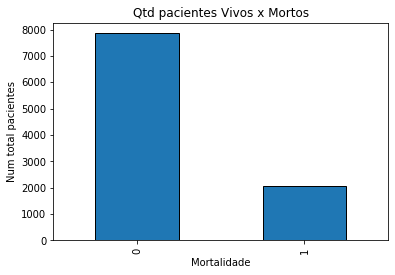

In [256]:
# Inicio plotando o gráfico da classe, pois parece ser a informação mais relevante e a que será prevista com os classificadores
df['Class'].value_counts().plot.bar(edgecolor="black")
plt.xlabel('Mortalidade') 
plt.ylabel('Num total pacientes')
plt.title('Qtd pacientes Vivos x Mortos')
plt.show()

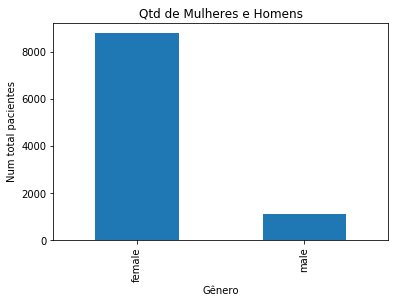

In [257]:
df['SEX'].value_counts().plot.bar()
plt.xlabel('Gênero') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd de Mulheres e Homens')
plt.show()

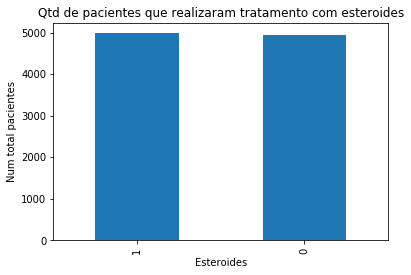

In [258]:
df['STEROID'].value_counts().plot.bar()
plt.xlabel('Esteroides') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd de pacientes que realizaram tratamento com esteroides')
plt.show()

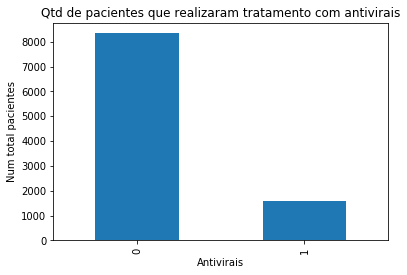

In [259]:
df['ANTIVIRALS'].value_counts().plot.bar()
plt.xlabel('Antivirais') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd de pacientes que realizaram tratamento com antivirais')
plt.show()

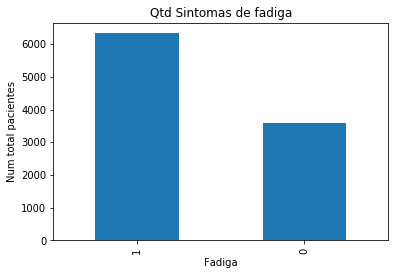

In [260]:
df['FATIGUE'].value_counts().plot.bar()
plt.xlabel('Fadiga') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd Sintomas de fadiga')
plt.show()

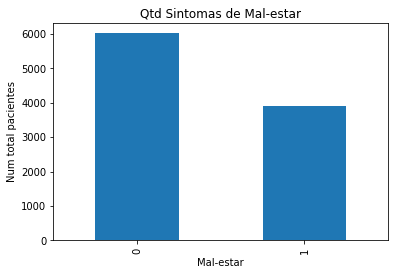

In [255]:
df['MALAISE'].value_counts().plot.bar()
plt.xlabel('Mal-estar') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd Sintomas de Mal-estar')
plt.show()

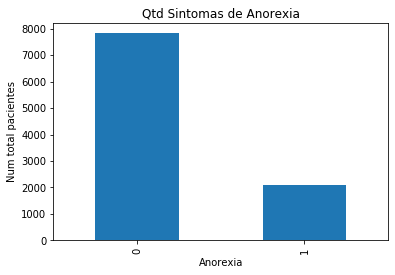

In [261]:
df['ANOREXIA'].value_counts().plot.bar()
plt.xlabel('Anorexia') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd Sintomas de Anorexia')
plt.show()

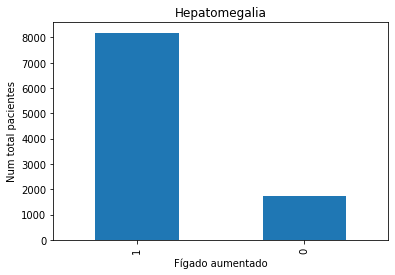

In [262]:
df['LIVER_BIG'].value_counts().plot.bar()
plt.xlabel('Fígado aumentado') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Hepatomegalia')
plt.show()

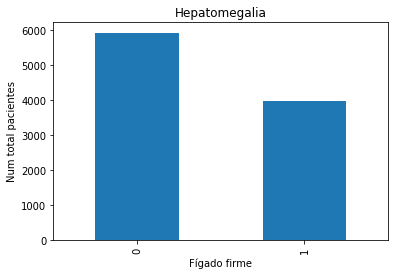

In [263]:
df['LIVER_FIRM'].value_counts().plot.bar()
plt.xlabel('Fígado firme') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Hepatomegalia')
plt.show()

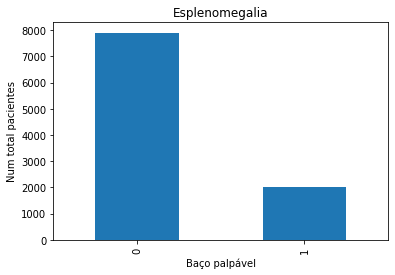

In [264]:
df['SPLEEN_PALPABLE'].value_counts().plot.bar()
plt.xlabel('Baço palpável') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Esplenomegalia')
plt.show()

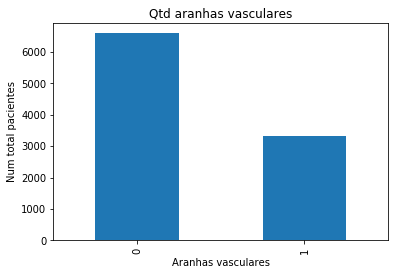

In [265]:
df['SPIDERS'].value_counts().plot.bar()
plt.xlabel('Aranhas vasculares') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd aranhas vasculares')
plt.show()

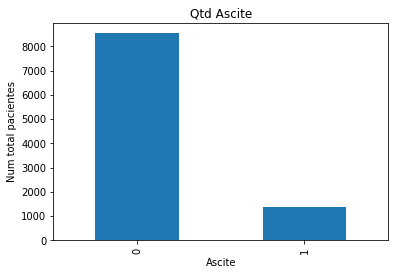

In [266]:
df['ASCITES'].value_counts().plot.bar()
plt.xlabel('Ascite') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd Ascite')
plt.show()

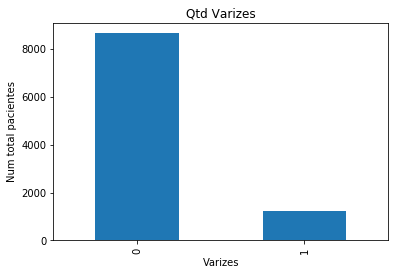

In [267]:
df['VARICES'].value_counts().plot.bar()
plt.xlabel('Varizes') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd Varizes')
plt.show()

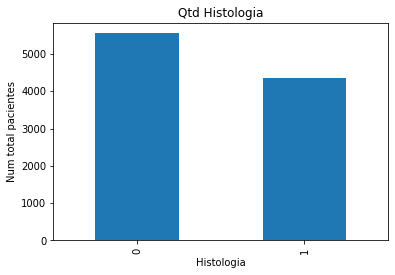

In [268]:
df['HISTOLOGY'].value_counts().plot.bar()
plt.xlabel('Histologia') 
plt.ylabel('Num total pacientes') 
plt.title('Qtd Histologia')
plt.show()

# Análise multivariada de dados


Nesta seção, você deve gerar ao menos 5 visualizações multivariadas. O objetivo aqui é descobrir relações e/ou correlações entre as variáveis do dataset.
Naturalmente, haverão comportamentos óbvios que serão descobertos, então ao menos **UMA** das visualizações deve apresentar um *insight* não óbvio dos dados.


### Dicas

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Importante

**Todas** as variáveis usadas nesta etapa devem ter sido avaliadas na etapa de análise univariada.

#### Gênero x Classe

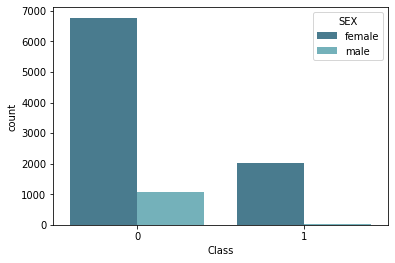

In [223]:
#sobrevivência por gênero
sns.countplot(df['Class'], hue=df['SEX'], palette='GnBu_d')
plt.show()

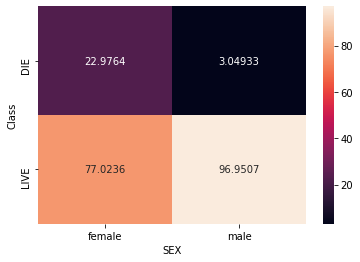

In [62]:
#Porcentagem de sobrevivência entre os gêneros
ctab = 100 * pd.crosstab(df['Class'], df['SEX'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Esteroide x Classe

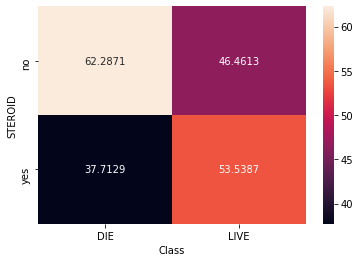

In [63]:
ctab = 100 * pd.crosstab(df['STEROID'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Antivirais x Classe

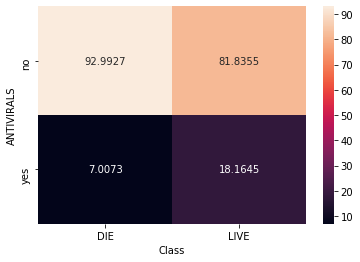

In [64]:
ctab = 100 * pd.crosstab(df['ANTIVIRALS'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Fadiga x Classe

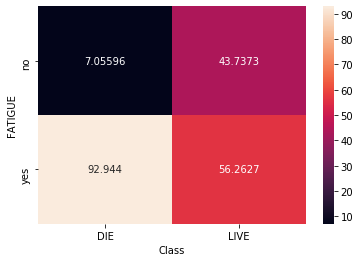

In [65]:
ctab = 100 * pd.crosstab(df['FATIGUE'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Mal-estar x Classe

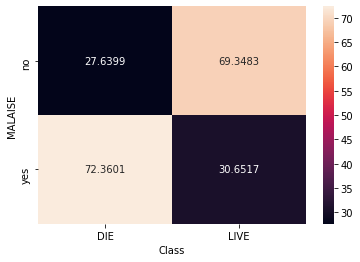

In [66]:
ctab = 100 * pd.crosstab(df['MALAISE'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Anorexia x Classe

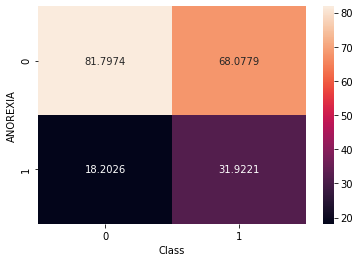

In [339]:
ctab = 100 * pd.crosstab(df['ANOREXIA'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Hepatomegalia x Classe

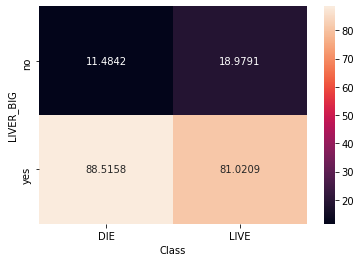

In [68]:
ctab = 100 * pd.crosstab(df['LIVER_BIG'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

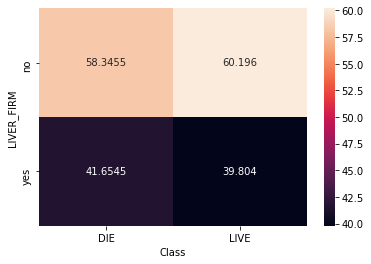

In [69]:
ctab = 100 * pd.crosstab(df['LIVER_FIRM'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Esplenomegalia x Classe

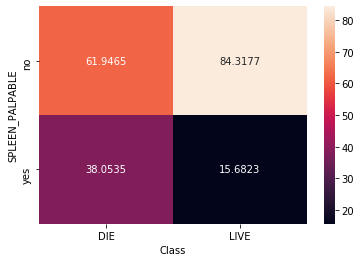

In [70]:
ctab = 100 * pd.crosstab(df['SPLEEN_PALPABLE'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Aranhas Vasculares x Classe

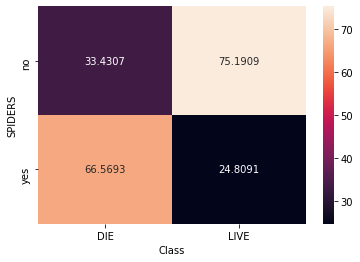

In [71]:
ctab = 100 * pd.crosstab(df['SPIDERS'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Aranhas Vasculares x Gênero

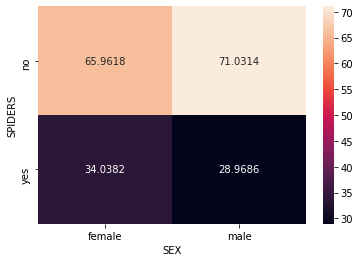

In [72]:
ctab = 100 * pd.crosstab(df['SPIDERS'], df['SEX'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Ascite x Classe

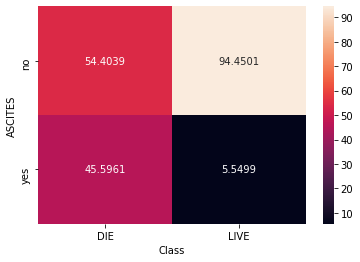

In [73]:
ctab = 100 * pd.crosstab(df['ASCITES'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Ascite x Gênero

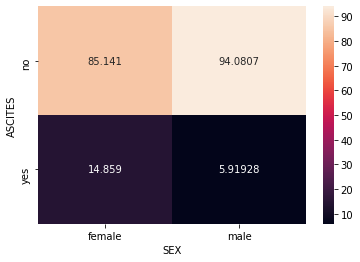

In [74]:
ctab = 100 * pd.crosstab(df['ASCITES'], df['SEX'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Varizes x Classe

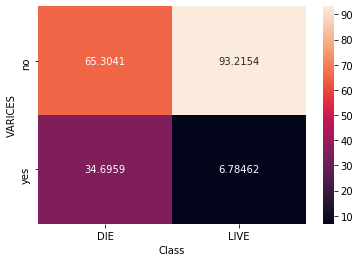

In [75]:
ctab = 100 * pd.crosstab(df['VARICES'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Varizes x Gênero

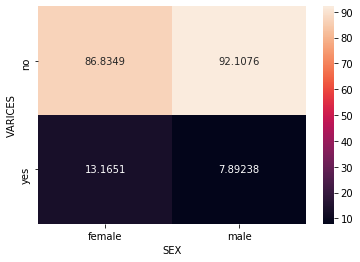

In [76]:
ctab = 100 * pd.crosstab(df['VARICES'], df['SEX'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Histologia x Classe

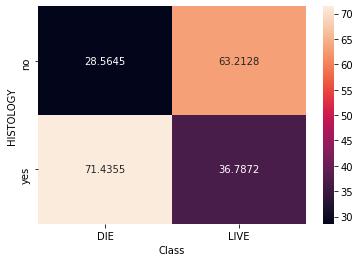

In [77]:
ctab = 100 * pd.crosstab(df['HISTOLOGY'], df['Class'],  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g') 
plt.show()

#### Idade

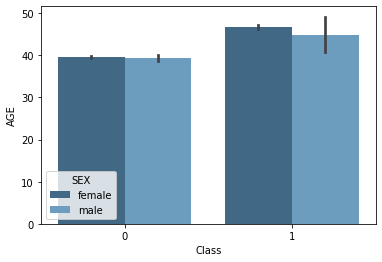

In [221]:
sns.barplot(df['Class'], df['AGE'], hue=df['SEX'], palette='Blues_d')
plt.show()

#### Bilirrubina

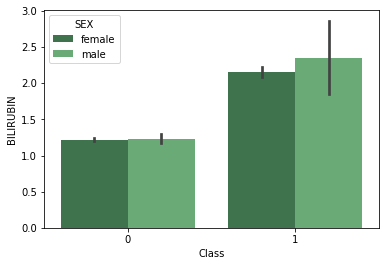

In [173]:
sns.barplot(df['Class'], df['BILIRUBIN'], hue=df['SEX'], palette="Greens_d")
plt.show()

In [296]:
#Máscara para avaliar se os pacientes que apresentaram Bilirrubina acima do normal tinham mau prognóstico
df_bili = df[df['BILIRUBIN'] > 1.2]

In [298]:
len(df_bili[df_bili['Class']== 0]), len(df_bili[df_bili['Class'] == 1])

(2028, 1296)

In [299]:
len(df[df['Class']== 0]), len(df[df['Class'] == 1])

(7856, 2055)

Porcentagem classe 0 = 2028 / 78.56 (total classe 0 / 100) = 25,81%

Porcentagem classe 1 = 1296 / 20.55 (total classe 1 / 100) = 63,06%

#### Fosfatase Alcalina

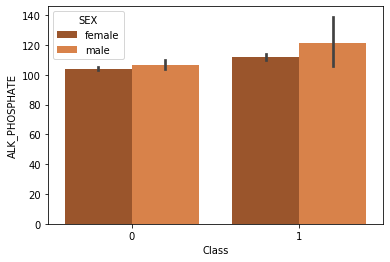

In [170]:
sns.barplot(df['Class'], df['ALK_PHOSPHATE'],  hue=df['SEX'], palette="Oranges_d")
plt.show()

In [273]:
#Máscara para avaliar se os pacientes que apresentaram fosfatase alk acima do normal tinham mau prognóstico
df_alkaltom = mask1[df['ALK_PHOSPHATE'] > 104]
df_alkaltoh = mask2[df['ALK_PHOSPHATE'] > 129]

C:\Users\jessi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\jessi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [295]:
len(df_alkaltom[df_alkaltom['Class']== 0]), len(df_alkaltom[df_alkaltom['Class'] == 1])

(2824, 1126)

In [293]:
len(df[df['Class']== 0]), len(df[df['Class'] == 1])

(7856, 2055)

Porcentagem classe0 = 35,94%

Porcentagem classe1 = 54,79%

In [291]:
len(df_alkaltoh[df_alkaltoh['Class']== 0]), len(df_alkaltoh[df_alkaltoh['Class'] == 1])

(240, 11)

Porcentagem classe0 = 3,054%

Porcentagem classe1 = 0,53%

#### TGO

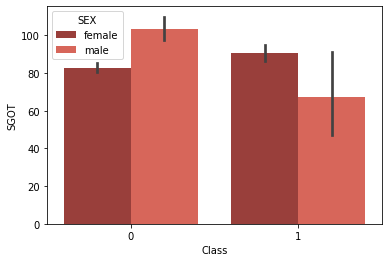

In [167]:
sns.barplot(df['Class'], df['SGOT'], hue=df['SEX'], palette="Reds_d")
plt.show()

In [300]:
#Máscara para avaliar se os pacientes que apresentaram TGO acima do normal tinham mau prognóstico
df_sgot = df[df['SGOT'] > 40]

In [301]:
len(df_sgot[df_sgot['Class']== 0]), len(df_sgot[df_sgot['Class'] == 1])

(5211, 1525)

In [299]:
len(df[df['Class']== 0]), len(df[df['Class'] == 1])

(7856, 2055)

Porcentagem classe 0 = 66,33%

Porcentagem classe 1 = 74,2%

#### Albumina

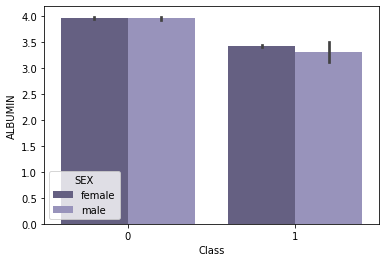

In [166]:
sns.barplot(df['Class'], df['ALBUMIN'], hue=df['SEX'], palette="Purples_d")
plt.show()

In [302]:
#Máscara para avaliar se os pacientes que apresentaram albumina abaixo do normal tinham mau prognóstico
df_alb = df[df['ALBUMIN'] < 3.5]

In [303]:
len(df_alb[df_alb['Class']== 0]), len(df_alb[df_alb['Class'] == 1])

(1291, 1027)

In [299]:
len(df[df['Class']== 0]), len(df[df['Class'] == 1])

(7856, 2055)

Porcentagem classe 0 = 16,43%

Porcentagem classe 1 = 49,9%

#### Tempo de Protrombina

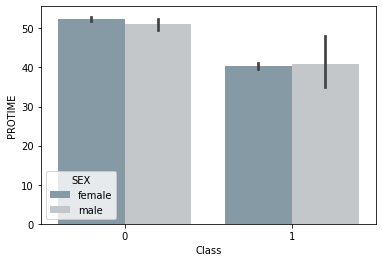

In [320]:
sns.barplot(df['Class'], df['PROTIME'], hue= df['SEX'], palette='RdBu_d')
plt.show()

In [304]:
#Máscara para avaliar se os pacientes que apresentaram TAP acima do normal tinham mau prognóstico
df_tap = df[df['PROTIME'] > 14]

In [305]:
len(df_tap[df_tap['Class']== 0]), len(df_tap[df_tap['Class'] == 1])

(7731, 2007)

In [299]:
len(df[df['Class']== 0]), len(df[df['Class'] == 1])

(7856, 2055)

Porcentagem classe 0 = 98,4% 

Porcentagem classe 1 = 97,66%

# Visualizações efetivas

Nesta seção, você deve escolher **duas visualizações apresentadas anteriormente** e melhorar suas componentes visuais. O objetivo é preparar estas visualizações para uma audiência que não possui *expertise* sobre o dataset analisado.
Desta forma, garanta que o uso de tamanhos, cores, texturas, formas, etc, sejam apropriados e não exista "chart junk".

In [150]:
ctab = 100 * pd.crosstab(df['Class'], df['SEX'], normalize='columns')
ctab

SEX,female,male
Class,,
0,77.023647,96.950673
1,22.976353,3.049327


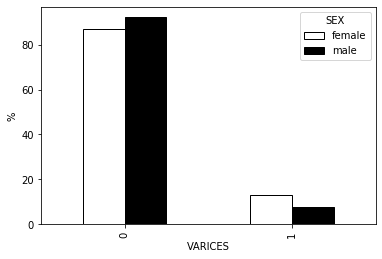

In [157]:
ctab = 100 * pd.crosstab(df['VARICES'], df['SEX'], normalize='columns')
ctab.plot.bar(color= ['white', 'black'], edgecolor='black')
plt.legend(title='SEX') 
plt.ylabel('%')
plt.show()

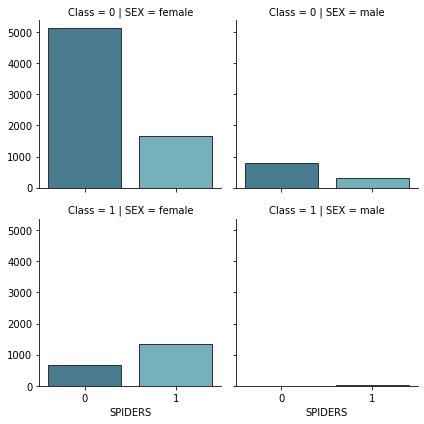

In [322]:
#Melhoria da visualização comparando presença e ausência de veias-aranha, sobrevida dos pacientes e divididos por gênero
g = sns.FacetGrid(df, row='Class', col='SEX', col_order=['female', 'male'])  
g.map(sns.countplot, 'SPIDERS', palette="GnBu_d", edgecolor = '.2')
plt.show()

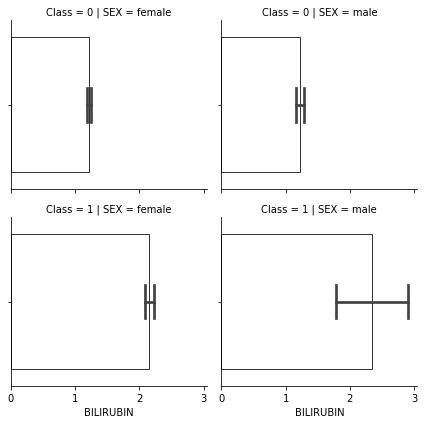

In [338]:
g = sns.FacetGrid(df, row='Class', col='SEX', col_order=['female', 'male'])  
g.map(sns.barplot, 'BILIRUBIN', color='white', edgecolor = '.2', capsize=.2)
plt.ylabel('')
plt.show()

# Aprendizagem de Máquina

Nesta seção voce deve utilizar os algoritmos de aprendizagem de máquina para classificação do dataset escolhido. O objetivo é classificar o dataset de acordo com a sua classe determinada, para tanto, você deve efetuar as etapas de pré-processamento, busca de hiperparametros, avaliação e comparação das técnicas escolhidas.

# Pré-processamento

Nesta seção utilize as técnicas de pré-processamento estudadas necessárias para aplicar os algoritmos de aprendizagem de máquina.

#### > Passo 1: Transformar dados nominais em numéricos

In [90]:
df.replace(to_replace=['yes', 'no'], value=[1, 0], inplace=True)

In [91]:
df

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
276826,51.021637,female,0,0,1,0,0,1,0,1,1,1,1,5.185160,87.396654,73.834579,3.678289,32.699447,1,DIE
849425,48.678283,female,1,0,1,0,0,1,0,0,0,0,0,0.643706,86.255362,64.186930,4.216774,57.257385,1,LIVE
504499,38.361577,female,0,0,1,1,1,1,0,0,1,0,0,6.824581,77.496402,22.732428,4.034230,78.724236,0,DIE
601054,45.456802,male,0,0,0,0,0,1,1,0,0,0,0,0.557364,81.151737,99.561217,3.335005,25.879596,0,LIVE
980221,29.033731,female,1,0,1,0,0,1,1,0,0,1,0,0.576757,85.930826,278.008937,4.155596,38.642044,1,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662322,32.137096,female,1,0,1,0,0,1,0,0,0,1,0,5.560456,103.549903,65.106479,4.699833,11.412975,1,LIVE
423063,59.350357,female,0,0,1,0,0,1,0,0,1,0,0,0.434329,68.016868,173.679136,3.523148,29.824489,0,LIVE
610680,29.254426,female,0,0,0,0,0,1,0,0,1,0,0,5.344304,155.750395,19.205810,3.392475,101.113576,1,DIE
639271,48.958449,female,0,0,1,1,1,1,0,1,0,1,0,1.376654,87.021196,80.629962,2.619140,25.515133,1,DIE


In [92]:
#Transformar classe
df['Class'].replace(to_replace=['LIVE', 'DIE'], value=[0, 1], inplace=True)

In [93]:
#Como valores de gênero tem o mesmo peso, usarei get_dummies para a transformação
dfNumerico = pd.get_dummies(df, prefix_sep='_',drop_first=True)
dfNumerico.dtypes

AGE                float64
STEROID              int64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER_BIG            int64
LIVER_FIRM           int64
SPLEEN_PALPABLE      int64
SPIDERS              int64
ASCITES              int64
VARICES              int64
BILIRUBIN          float64
ALK_PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY            int64
Class                int64
SEX_male             uint8
dtype: object

#### > Passo 2: Normalização dos Valores

In [94]:
#dropa a classe income pra que ele possa prever ela
features = np.array(dfNumerico.drop('Class', axis = 1))
label = np.array(dfNumerico['Class'])
#Normalizar os resultados
scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizado = scaler.transform(features)

#### > Passo 3: Balanceamento de Classe

In [95]:
#quantidade de dados na classe ==> Balanceamento?
len(df[df['Class']== 0]), len(df[df['Class'] == 1])

(7856, 2055)

# Avaliação

Nesta seção você deve:
- Utilizar pelo menos 5 classificadores (estudados ou não em nossos encontros);
- Determinar a metodologia de avaliação de acordo com as características do dataset (holdout ou validação cruzada);
- Efetuar a busca de hiperparâmetros de acordo com cada classificador. A capacidade de generalização do modelo deve ser levada em consideração durante a busca e definição dos parametros;
- Plotar a curva ROC entre os classificadores;
- Para o melhor classificador, determinar acurácia de acordo com o ponto de operação desejado em seu dataset;

#### > Passo 1: Metodologia de Avaliação = HOLDOUT

In [96]:
#Separar treino e teste com hold out

trainFeatures, testFeatures, trainLabel, testLabel = train_test_split(featuresNormalizado, label, train_size=0.7, random_state=42)

#### > Passo 2: Busca por hiperparâmetros de cada classificador

In [97]:
#Generalização para determinar valor do classificador kNN
listaErroTreinokNN = [] 
listaErroTestekNN = []
for i in range (200, 1, -2): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainFeatures, trainLabel) 
    
    
    predicaoTeste = knn.predict(testFeatures)
    accTeste = accuracy_score(predicaoTeste, testLabel)
        
    predicaoTreino = knn.predict(trainFeatures)
    accTreino = accuracy_score(predicaoTreino, trainLabel)
    listaErroTreinokNN.append(1-accTreino)
    listaErroTestekNN.append(1-accTeste)    

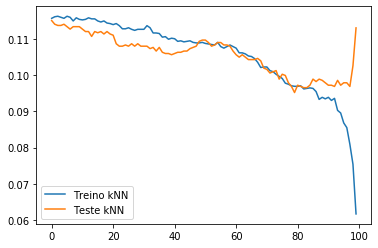

In [98]:
plt.plot(listaErroTreinokNN)
plt.plot(listaErroTestekNN)
plt.legend(['Treino kNN', 'Teste kNN'])
plt.show()

In [99]:
#MATRIZ DE CONFUSÃO DA kNN
predicaoTeste = knn.predict(testFeatures)
matriz = confusion_matrix(testLabel,predicaoTeste)
matriz

array([[2283,   72],
       [ 264,  355]], dtype=int64)

In [100]:
#Generalização para determinar valor do classificador DT
listaErroTreino = []
listaErroTeste = []
for i in range(200,1,-2):
    tree = DecisionTreeClassifier(min_samples_split=i)
    tree.fit(trainFeatures, trainLabel)
    
    predicaoTeste = tree.predict(testFeatures)
    accTeste = accuracy_score(predicaoTeste, testLabel)
        
    predicaoTreino = tree.predict(trainFeatures)
    accTreino = accuracy_score(predicaoTreino, trainLabel)
    listaErroTreino.append(1-accTreino)
    listaErroTeste.append(1-accTeste)
    print(i)

200
198
196
194
192
190
188
186
184
182
180
178
176
174
172
170
168
166
164
162
160
158
156
154
152
150
148
146
144
142
140
138
136
134
132
130
128
126
124
122
120
118
116
114
112
110
108
106
104
102
100
98
96
94
92
90
88
86
84
82
80
78
76
74
72
70
68
66
64
62
60
58
56
54
52
50
48
46
44
42
40
38
36
34
32
30
28
26
24
22
20
18
16
14
12
10
8
6
4
2


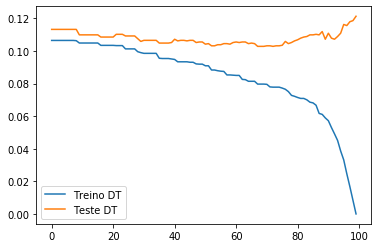

In [101]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino DT', 'Teste DT'])
plt.show()

In [102]:
#MATRIZ DE CONFUSÃO DA DECISION TREE
predicaoTeste = tree.predict(testFeatures)
matriz = confusion_matrix(testLabel,predicaoTeste)
matriz

array([[2164,  191],
       [ 170,  449]], dtype=int64)

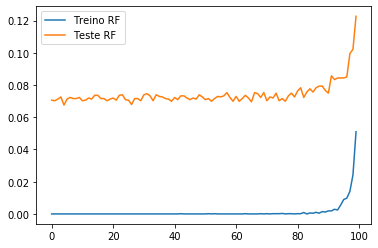

In [103]:
#Generalização para determinar valor do classificador Random Forest
listaErroTreinoRF = []
listaErroTesteRF = []
for i in range(200,1,-2):
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(trainFeatures, trainLabel)
    
    predicaoTeste = forest.predict(testFeatures)
    accTeste = accuracy_score(predicaoTeste, testLabel)
        
    predicaoTreino = forest.predict(trainFeatures)
    accTreino = accuracy_score(predicaoTreino, trainLabel)
    listaErroTreinoRF.append(1-accTreino)
    listaErroTesteRF.append(1-accTeste)
    
plt.plot(listaErroTreinoRF)
plt.plot(listaErroTesteRF)
plt.legend(['Treino RF', 'Teste RF'])
plt.show()

In [104]:
#MATRIZ DE CONFUSÃO DA RANDOM FOREST
predicaoTeste = forest.predict(testFeatures)
matriz = confusion_matrix(testLabel,predicaoTeste)
matriz

array([[2298,   57],
       [ 308,  311]], dtype=int64)

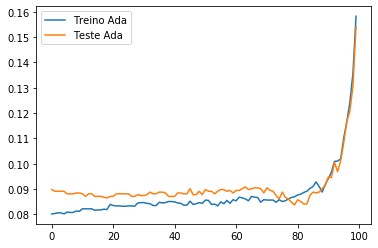

In [105]:
# Generalização para determinar valor do classificador AdaBoost
listaErroTreinoAda = []
listaErroTesteAda = []
for i in range(200,1,-2):
    adaboost = AdaBoostClassifier(n_estimators=i)
    adaboost.fit(trainFeatures, trainLabel)
    
    predicaoTeste = adaboost.predict(testFeatures)
    accTeste = accuracy_score(predicaoTeste, testLabel)
        
    predicaoTreino = adaboost.predict(trainFeatures)
    accTreino = accuracy_score(predicaoTreino, trainLabel)
    listaErroTreinoAda.append(1-accTreino)
    listaErroTesteAda.append(1-accTeste)  
plt.plot(listaErroTreinoAda)
plt.plot(listaErroTesteAda)
plt.legend(['Treino Ada', 'Teste Ada'])
plt.show()

In [106]:
# MATRIZ DE CONFUSÃO ADA
predicaoAda = adaboost.predict(testFeatures)
confusion_matrix(testLabel, predicaoAda)

array([[2311,   44],
       [ 414,  205]], dtype=int64)

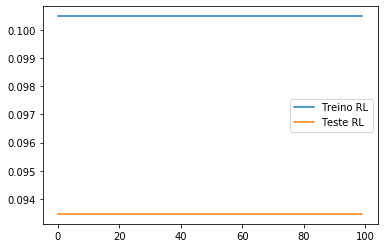

In [107]:
# Generalização para determinar valor da Regressão Logística
listaErroTreinoRL = []
listaErroTesteRL = []
for i in range(200,1,-2):
    regressao = LogisticRegression(intercept_scaling=i)
    regressao.fit(trainFeatures, trainLabel)
    
    predicaoTeste = regressao.predict(testFeatures)
    accTeste = accuracy_score(predicaoTeste, testLabel)
        
    predicaoTreino = regressao.predict(trainFeatures)
    accTreino = accuracy_score(predicaoTreino, trainLabel)
    listaErroTreinoRL.append(1-accTreino)
    listaErroTesteRL.append(1-accTeste)  
plt.plot(listaErroTreinoRL)
plt.plot(listaErroTesteRL)
plt.legend(['Treino RL', 'Teste RL'])
plt.show()

In [108]:
# MATRIZ DE CONFUSÃO RL
predicaoRL = regressao.predict(testFeatures)
confusion_matrix(testLabel, predicaoRL)

array([[2255,  100],
       [ 178,  441]], dtype=int64)

#### > Curva ROC a partir do melhor hiperparâmetro de cada classificador

In [109]:
#Para kNN:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(trainFeatures, trainLabel)

KNeighborsClassifier(n_neighbors=40)

In [110]:
predictProbaknn = knn.predict_proba(testFeatures)

In [111]:
fprknn, tprknn, limiarknn = roc_curve(testLabel, predictProbaknn[:,1], pos_label=1)

In [112]:
#Para Decision Tree:
tree = DecisionTreeClassifier(min_samples_split=100)
tree.fit(trainFeatures, trainLabel)

DecisionTreeClassifier(min_samples_split=100)

In [113]:
predictProbaTree = tree.predict_proba(testFeatures)

In [114]:
fprtree, tprtree, limiartree = roc_curve(testLabel, predictProbaTree[:,1], pos_label=1)

In [115]:
#Para Random Forest
forest = RandomForestClassifier(n_estimators=45)
forest.fit(trainFeatures, trainLabel)

RandomForestClassifier(n_estimators=45)

In [116]:
predictProbaRF = forest.predict_proba(testFeatures)

In [117]:
fprforest, tprforest, limiarforest = roc_curve(testLabel, predictProbaRF[:,1], pos_label=1)

In [118]:
#Para AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40)
adaboost.fit(trainFeatures, trainLabel)

AdaBoostClassifier(n_estimators=40)

In [119]:
predictProbaAda = adaboost.predict_proba(testFeatures)

In [120]:
fprAda, tprAda, limiarAda = roc_curve(testLabel, predictProbaAda[:,1], pos_label=1)

In [128]:
#Para Regressão Logística
regressao = LogisticRegression(intercept_scaling=100)
regressao.fit(trainFeatures, trainLabel)

LogisticRegression(intercept_scaling=100)

In [129]:
predictProbaRL = regressao.predict_proba(testFeatures)

In [130]:
fprRL, tprRL, limiarRL = roc_curve(testLabel, predictProbaRL[:,1], pos_label=1)

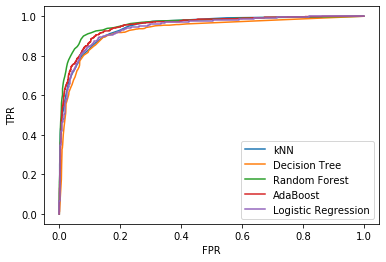

In [131]:
plt.plot(fprknn, tprknn)
plt.plot(fprtree, tprtree)
plt.plot(fprforest, tprforest)
plt.plot(fprAda, tprAda)
plt.plot(fprRL, tprRL)
plt.legend(['kNN','Decision Tree', 'Random Forest', 'AdaBoost', 'Logistic Regression'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#### > Determinar AUC das curvas dos classificadores

In [132]:
aucknn = auc(fprknn, tprknn)
aucRF = auc(fprforest, tprforest)
aucDT = auc(fprtree, tprtree)
aucAda = auc(fprAda, tprAda)
aucRL = auc(fprRL, tprRL)
aucknn, aucDT, aucRF, aucAda, aucRL

(0.9477998552558918,
 0.9284974395384653,
 0.9613152506096745,
 0.9526065944318108,
 0.943057942232695)

Com AUC de 0.96, Random Forest é o melhor classificador para esta classe

#### > Determinar a acurária do melhor ponto de operação da RF

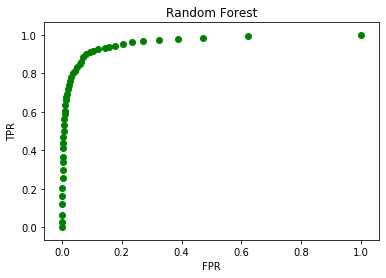

In [126]:
plt.scatter(fprforest, tprforest, color='g')
plt.title('Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [127]:
fprforest, tprforest, limiarforest

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.24628450e-04,
        4.24628450e-04, 1.69851380e-03, 2.12314225e-03, 2.54777070e-03,
        2.54777070e-03, 2.97239915e-03, 3.39702760e-03, 3.82165605e-03,
        4.67091295e-03, 5.94479830e-03, 6.79405520e-03, 7.21868365e-03,
        8.91719745e-03, 1.06157113e-02, 1.06157113e-02, 1.27388535e-02,
        1.44373673e-02, 1.78343949e-02, 2.12314225e-02, 2.37791932e-02,
        2.67515924e-02, 3.05732484e-02, 3.73673036e-02, 4.24628450e-02,
        5.05307856e-02, 5.90233546e-02, 6.41188960e-02, 7.13375796e-02,
        7.94055202e-02, 9.38428875e-02, 1.04033970e-01, 1.20169851e-01,
        1.43524416e-01, 1.57112527e-01, 1.77919321e-01, 2.05095541e-01,
        2.33545648e-01, 2.71337580e-01, 3.26114650e-01, 3.88959660e-01,
        4.72611465e-01, 6.21656051e-01, 1.00000000e+00]),
 array([0.        , 0.02746365, 0.06138934, 0.11954766, 0.15993538,
        0.20516963, 0.25686591, 0.29886914, 0.33764136, 0.36672052,
        0.4119

#### Operar com o fpr em 10% e o maior tpr possível

tpr = 0.91760905

fpr = 1.18895966e-01

limiar = 0.26666667

# Últimos passos

1. Salve uma cópia deste relatório em formato PDF (`.pdf`)
2. Envie o relatório na respectiva atividade no Blackboard.